# Installing all useful packanges for the project

In [171]:
#! pip install beautifulsoup4
#! pip install requests
#! pip install lxml
#! pip install nltk
#! pip install re
#!pip install stopwords
#import nltk
#nltk.download('wordnet')
#! pip install plotly.express
#!pip install wordcloud

# Web scraping from airlinequality.com

In [10]:
from bs4 import BeautifulSoup as bs
from time import sleep
from random import randint
import numpy as np
import pandas as pd
import requests



# creating empty list to store data 
reviews = []

rate = []

date = []

country = []

#web scraping in multiple pages we create for loop to loop through 100 web pages
pages = np.arange(1,100,1)
url = "https://www.airlinequality.com/airline-reviews/british-airways"
for page in pages:
    html_text = requests.get(url + "/page/" + str(page) + "/").text
    soup = bs(html_text, "lxml")
    contents = soup.find_all("div", class_ = "text_content")
    for content in contents:
        reviews.append(content.text)
    for r in soup.find_all("div", class_ = "rating-10"):
        try:
            rate.append(r.span.text)
        except:
            rate.append("None")
            
    for t in soup.find_all("time"):
        date.append(t.text)
    for c in soup.find_all("h3"):
        country.append(c.span.next_sibling.text.strip(" ()"))
        
        
  

In [11]:
# we have to check if all the varibles have th same length this will make dataframe formation 
len(country)

990

In [12]:
len(reviews)

990

In [14]:
# after finding the rate variable has diffrent length than the other variables we fix that by;
rate=rate[:990]

In [16]:
my_data = pd.DataFrame({"date":date,"country":country,"rate":rate,"reviews":reviews})
my_data.head()

,date,country,rate,reviews
0,10th March 2023,United Kingdom,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,✅ Trip Verified | The incoming and outgoing f...
1,10th March 2023,Australia,1,✅ Trip Verified | Back in December my family ...
2,10th March 2023,United Kingdom,1,✅ Trip Verified | As usual the flight is dela...
3,9th March 2023,United Kingdom,1,✅ Trip Verified | A short BA euro trip and thi...
4,8th March 2023,United States,8,Not Verified | We are flying Business class f...


In [17]:
import os
current_working_directory= os.getcwd()
my_data.to_csv(current_working_directory+"/BA_data.csv")

In [27]:
mdata = pd.read_csv(current_working_directory+"/BA_data.csv",index_col=0)
mdata.head()

,date,country,rate,reviews
0,10th March 2023,United Kingdom,5,✅ Trip Verified | The incoming and outgoing f...
1,10th March 2023,Australia,1,✅ Trip Verified | Back in December my family ...
2,10th March 2023,United Kingdom,1,✅ Trip Verified | As usual the flight is dela...
3,9th March 2023,United Kingdom,1,✅ Trip Verified | A short BA euro trip and thi...
4,8th March 2023,United States,8,Not Verified | We are flying Business class f...


# Data cleaning 

In [32]:
# adding the verification status column in the data set

verified = mdata.reviews.str.contains("Trip Verified")
mdata["verified"]= verified
mdata.head()

,date,country,rate,reviews,verified
0,10th March 2023,United Kingdom,5,✅ Trip Verified | The incoming and outgoing f...,True
1,10th March 2023,Australia,1,✅ Trip Verified | Back in December my family ...,True
2,10th March 2023,United Kingdom,1,✅ Trip Verified | As usual the flight is dela...,True
3,9th March 2023,United Kingdom,1,✅ Trip Verified | A short BA euro trip and thi...,True
4,8th March 2023,United States,8,Not Verified | We are flying Business class f...,False


In [109]:
#separating the pancutions, lowercasing the review sentences
review_data = mdata.reviews.str.strip("✅ Trip Verified | ")
text_data = []
for review in review_data:
    rev = re.sub("[^a-zA-Z]","",review) 
    rev = review.lower()
    rev = review.split()
    #rev = [lemma.lemmatize(word) for word in review if word not in set (stopwords.words("english"))]
    rev = "".join(review)
    text_data.append(rev)
    
mdata["text_reviews"] = text_data #adding a column in a dataframe
mdata.head()

    
    

,date,country,rate,reviews,verified,text reviews,text_reviews
0,2023-03-10,United Kingdom,5,✅ Trip Verified | The incoming and outgoing f...,True,he incoming and outgoing flight was delayed be...,he incoming and outgoing flight was delayed be...
1,2023-03-10,Australia,1,✅ Trip Verified | Back in December my family ...,True,Back in December my family and I as we were ge...,Back in December my family and I as we were ge...
2,2023-03-10,United Kingdom,1,✅ Trip Verified | As usual the flight is dela...,True,"As usual the flight is delayed this week, it a...","As usual the flight is delayed this week, it a..."
3,2023-03-09,United Kingdom,1,✅ Trip Verified | A short BA euro trip and thi...,True,A short BA euro trip and this is where BA exce...,A short BA euro trip and this is where BA exce...
4,2023-03-08,United States,8,Not Verified | We are flying Business class f...,False,Not Verified | We are flying Business class f...,Not Verified | We are flying Business class f...


In [110]:
mdata.date = pd.to_datetime(mdata.date)
mdata.dtypes# checking the data type of the variables

,date,country,rate,reviews,verified,text reviews,text_reviews
0,2023-03-10,United Kingdom,5,✅ Trip Verified | The incoming and outgoing f...,True,he incoming and outgoing flight was delayed be...,he incoming and outgoing flight was delayed be...
1,2023-03-10,Australia,1,✅ Trip Verified | Back in December my family ...,True,Back in December my family and I as we were ge...,Back in December my family and I as we were ge...
2,2023-03-10,United Kingdom,1,✅ Trip Verified | As usual the flight is dela...,True,"As usual the flight is delayed this week, it a...","As usual the flight is delayed this week, it a..."
3,2023-03-09,United Kingdom,1,✅ Trip Verified | A short BA euro trip and thi...,True,A short BA euro trip and this is where BA exce...,A short BA euro trip and this is where BA exce...
4,2023-03-08,United States,8,Not Verified | We are flying Business class f...,False,Not Verified | We are flying Business class f...,Not Verified | We are flying Business class f...


In [111]:
#checking missing values
mdata.isnull().value_counts()

date   country  rate   reviews  verified  text reviews  text_reviews
False  False    False  False    False     False         False           990
dtype: int64

In [53]:
mdata.rate.unique()# checking for  unique values in the variable observations

array([ 5,  1,  8,  2, 10,  4,  6,  7,  9,  3], dtype=int64)

In [112]:
mdata.to_csv(current_working_directory+"/clean BA_data.csv")

mdata.head()

,date,country,rate,reviews,verified,text reviews,text_reviews
0,2023-03-10,United Kingdom,5,✅ Trip Verified | The incoming and outgoing f...,True,he incoming and outgoing flight was delayed be...,he incoming and outgoing flight was delayed be...
1,2023-03-10,Australia,1,✅ Trip Verified | Back in December my family ...,True,Back in December my family and I as we were ge...,Back in December my family and I as we were ge...
2,2023-03-10,United Kingdom,1,✅ Trip Verified | As usual the flight is dela...,True,"As usual the flight is delayed this week, it a...","As usual the flight is delayed this week, it a..."
3,2023-03-09,United Kingdom,1,✅ Trip Verified | A short BA euro trip and thi...,True,A short BA euro trip and this is where BA exce...,A short BA euro trip and this is where BA exce...
4,2023-03-08,United States,8,Not Verified | We are flying Business class f...,False,Not Verified | We are flying Business class f...,Not Verified | We are flying Business class f...


# Data analysis

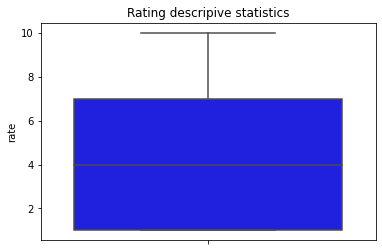

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt


mdata.rate.describe()# obtaing the descriptive statistics of a variable

#ploting the box plot
sns.boxplot(y = mdata.rate,color="blue")
plt.title("Rating descripive statistics")
plt.show()

1     281
5     137
2     101
10     97
3      85
9      78
8      70
4      53
7      49
6      39
Name: rate, dtype: int64


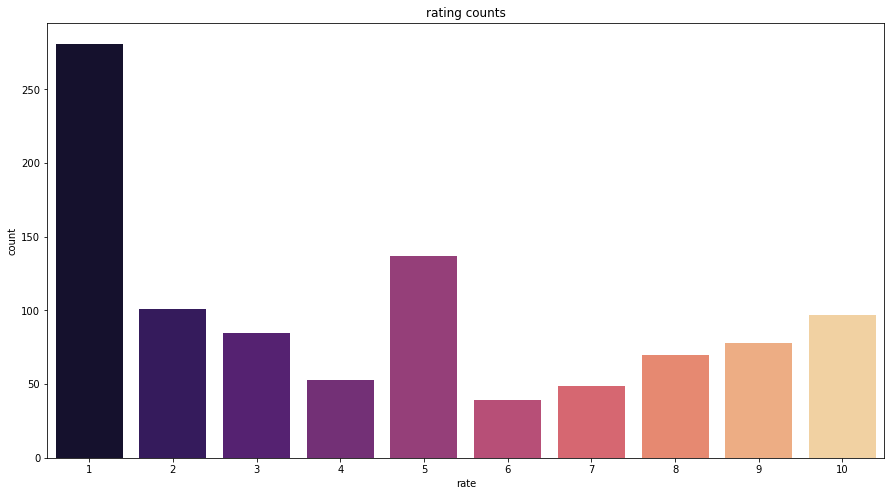

In [161]:
# ploting a count plot using seaborn
rate_count=mdata.rate.value_counts()
print(rate_count)
fig,ax = plt.subplots(figsize=(15,8))
sns.countplot(x="rate",data =mdata,ax=ax, palette ="magma")
plt.title("rating counts")
plt.show()
#rate_count
#rate_plot = plt.bar(mdata.rate,rate_count)

count                990
unique                52
top       United Kingdom
freq                 576
Name: country, dtype: object

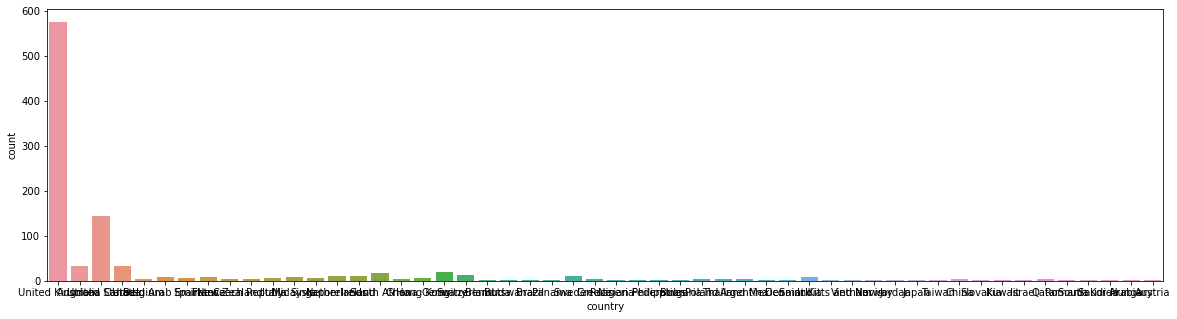

In [170]:
#rating plot by country
#fig,ax = plt.subplots(figsize=(20,5))
#sns.countplot(x = mdata.country,ax=ax)
mdata.country.describe()
#plt.xticks(rotation=60)


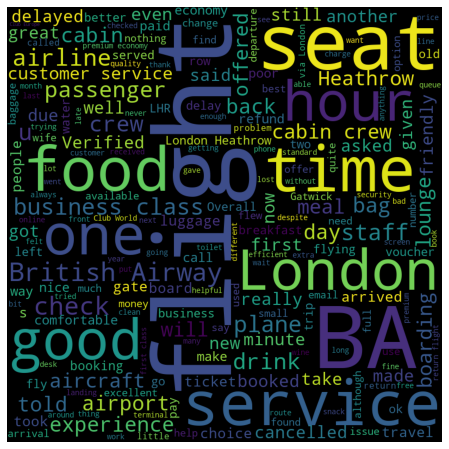

In [142]:
# ploting wordcloud diagram
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

rdata = "".join(mdata.text_reviews)
words = rdata.split(" ")

wordcloud = WordCloud(width = 800,height = 800,background_color = "black",
                      stopwords = set(STOPWORDS)).generate(rdata)

plt.figure(figsize = (8,8),facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


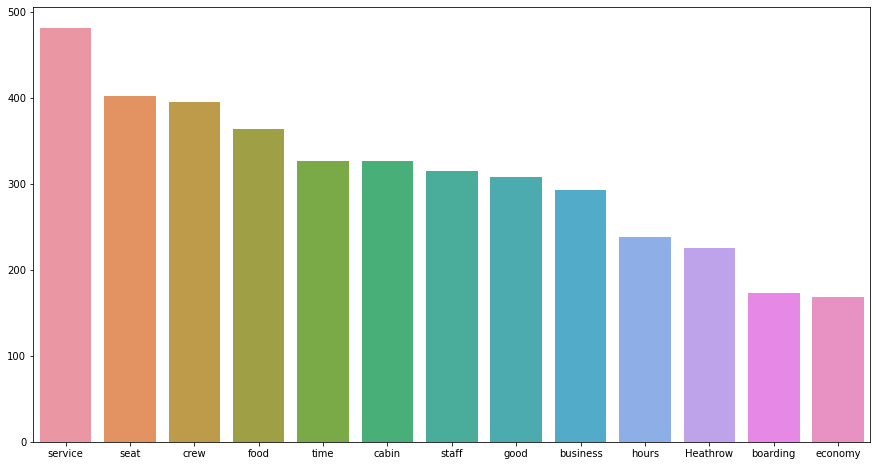

In [157]:
stopwords = set(STOPWORDS)
g = []
for w in words:
    if w not in stopwords:
        g.append(w)
ms = Counter(g)
interest = ["service","seat","crew", "food","time", "cabin", "staff","good","business",
           "hours","Heathrow","boarding","economy"]
reve =[]
for key in interest:
     reve.append(ms[key])
#print(reve)
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x=interest,y=reve,ax=ax)
plt.show()

        